<a href="https://colab.research.google.com/github/Swathi014/22ITCS100-Advanced-Machine-Learning/blob/main/Hotel_Booking_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. SETUP AND DATA LOADING

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Using XGBoost for high accuracy prediction
import xgboost as xgb

In [4]:
# Load the dataset
try:
    df = pd.read_csv('/content/drive/MyDrive/AML /Macro Project/hotel_bookings.csv')
    print("Data loaded successfully. Shape:", df.shape)
except FileNotFoundError:
    print("Error: 'hotel_bookings.csv' not found. Please download the dataset.")
    exit()

Data loaded successfully. Shape: (119390, 32)


# 2. EXPLORATORY DATA ANALYSIS (EDA) & INITIAL CLEANING

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [12]:
# Drop records where `is_canceled` is null (should be zero, but good practice)
df.dropna(subset=['is_canceled'], inplace=True)

In [ ]:
# Replace missing children/agent/company values with 0
df['children'].fillna(0, inplace=True)
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)

In [ ]:
# Replace missing 'country' with 'Unknown' (Country is a key categorical feature)
df['country'].fillna('Unknown',inplace=True)

In [15]:
# Drop rows with missing 'meal' type, as there are very few
df.dropna(subset = ['meal'],inplace=True)

In [16]:
# Clean up rows with zero guests (can be considered invalid bookings)
zero_guests = (df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0)
df.drop(df[zero_guests].index, inplace=True)

In [17]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [18]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


# 3. FEATURE ENGINEERING

In [19]:
#Total Guests

df['TotalGuests'] = df['adults'] + df['children'] + df['babies']

In [20]:
#Total Stay length (nights)

df['TotalStay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [21]:
#Create a new feature for the total cost of the stay (Approximation)

df['Price_per_Stay'] = df['adr'] * df['TotalStay']

In [23]:
# Drop features that are highly correlated, redundant, or not useful for prediction

features_to_drop = [
    'reservation_status', 'reservation_status_date',
    'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'babies',
    'company', 'agent' # High number of unique values/sparsity, better to drop
]

df.drop(features_to_drop, axis=1, inplace=True)

# 4. PREPARING DATA FOR MODELING (Encoding and Scaling)

In [24]:
# Separate target variable (y) and features (X)
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

In [25]:
# Identify numerical and categorical features
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

In [27]:
categorical_cols

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type']

In [28]:
# Apply One-Hot Encoding to categorical features
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [29]:
# Align columns after encoding, ensuring consistency
print(f"Total features after encoding: {X_encoded.shape[1]}")

Total features after encoding: 242


# 5. SPLITTING AND SCALING DATA

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [31]:
# Standardize numerical features (important for many ML algorithms, good practice for boosting)
scaler = StandardScaler()

In [32]:
# Fit scaler only on training data
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

In [33]:
# Transform test data
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# 6. MODEL TRAINING (XGBoost Classifier)

In [35]:
# Initialize and train the XGBoost model
# We set parameters that favor higher accuracy
print("\nTraining XGBoost Classifier...")

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    tree_method='hist' # Faster training for large datasets
)


Training XGBoost Classifier...


In [40]:
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

print("Model training complete.")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:15:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, ...)

# 7. MODEL EVALUATION

In [41]:
# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

In [42]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [43]:
print("\n" + "="*50)
print(" HOTEL BOOKING CANCELLATION PREDICTION RESULTS")
print("="*50)
print(f"Accuracy Score: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", class_report)
print("\nConfusion Matrix:\n", conf_matrix)


 HOTEL BOOKING CANCELLATION PREDICTION RESULTS
Accuracy Score: 88.37%

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     15002
           1       0.87      0.81      0.84      8840

    accuracy                           0.88     23842
   macro avg       0.88      0.87      0.87     23842
weighted avg       0.88      0.88      0.88     23842


Confusion Matrix:
 [[13880  1122]
 [ 1650  7190]]


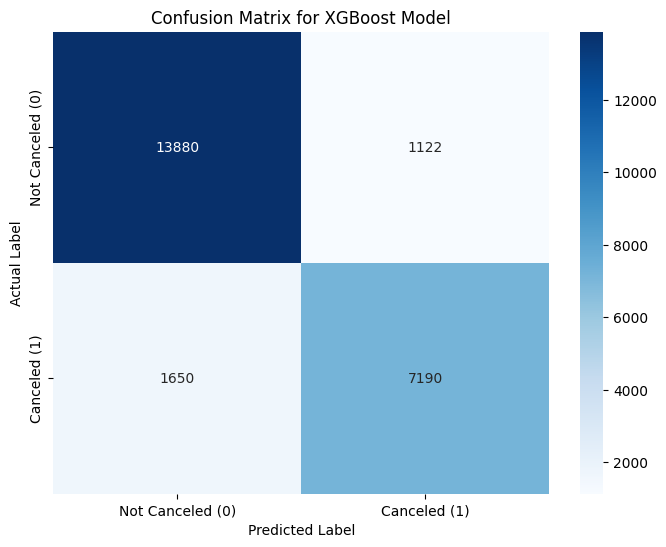

In [44]:
# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Canceled (0)', 'Canceled (1)'],
            yticklabels=['Not Canceled (0)', 'Canceled (1)'])
plt.title('Confusion Matrix for XGBoost Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

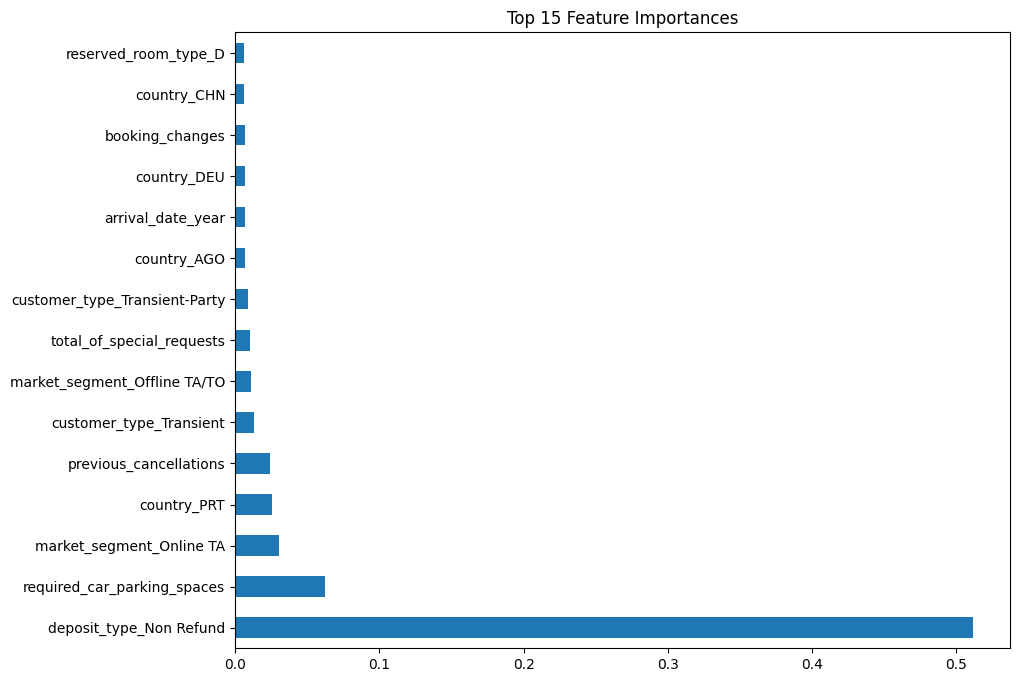

In [45]:
# Optional: Feature Importance Plot
plt.figure(figsize=(10, 8))
feat_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title('Top 15 Feature Importances')
plt.show()